## 볼록 껍질(Convex Hull)
- 2차원 평면 상에 점이 여러개가 있을 때, 이중 일부를 골라 나머지 점들을 모두 포함하는 볼록 다각형을 구하는 것
- 포함한다는 말은 점이 다각형의 경계에 걸쳐있는 것도 인정한다.
  - 따라서 변 위에 점이 있어도 된다.
- 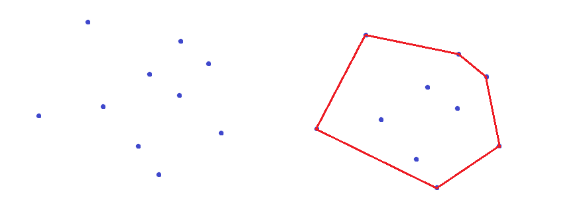
  - 여기서 볼록 껍질에 속한 점의 개수는 6개이다.

### Andrew's Monotone Chain
- ![220px-Animation_depicting_the_Monotone_algorithm.gif](assets/chull-2.gif)
- 일반적으로 정렬된 점들에서 위쪽 껍질과 아랫쪽 껍질을 구성해서 각 벡터들 방향의 일관성을 유지하면 볼록껍질을 만들 수 있다.
1. 점들을 일반적인 기준으로 정렬한다.
    - x좌표 오름차순 -> y좌표 오름차순
2. 점들을 순회하면서 다음을 확인한다.
    - 스택의 크기가 2 이상일 경우, 스택에서 2번째 위에있는 점을 `O`, 스택의 top에있는 점을 `A`, 현재 보는 점을 `B`라고 할 때\
    OA와 OB의 외적이 양수. 즉 반시계 방향에 존재하면 유지하고, 그 외에 경우에는 pop하여 `A`를 제거한다.
    - 스택에 현재 점을 넣는다.
    - 모든 점을 순회한 경우 마지막 점은 첫번째 점과 겹치므로 pop하여 제거한다.
3. 윗쪽 껍질이 구성되었다. 이제 정렬된 점들을 역순으로 순회하면서 2의 과정을 반복한다.
4. 아래껍질과 위껍질을 합친것이 볼록껍질을 구성하게 된다.

### 구현
- 설명은 1708(볼록껍질) 참고

In [ ]:
ccw = lambda o, a, b: (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
def andrews(P: list[tuple[int, int]]) -> list[tuple[int, int]]:
  P = sorted(P)

  lo = []
  for p in P:
    while len(lo) >= 2 and ccw(lo[-2], lo[-1], p) <= 0:
      lo.pop()
    lo.append(p)
  lo.pop()

  up = []
  for p in reversed(P) :
    while len(up) >= 2 and ccw(up[-2], up[-1], p) <= 0:
      up.pop()
    up.append(p)
  up.pop()
  
  return lo + up

### Graham Scan
- ![graham.gif](assets/chull-3.gif)
- 마찬가지로 스택을 이용해 정렬된 점들을 살피면서, \
나머지 점들이 시계방향/반시계방향으로 놓여있는지 확인하여 볼록 껍질을 구하는 방법
1. 점들을 다음 기준으로 정렬한다.
    - 반드시 볼록 껍질에 포함되는 시작점 `x` 하나를 선택한다.
      - 직관적으로 생각했을 때 x좌표가 가장 큰 점은 볼록껍질에 포함된다. \
      증명은 나중에..
      - 구현상 x좌표가 가장 큰 점을 선택했다.
    - 시작점 `x`에 대한 각도 오름차순(단 atan2의 범위가 $[0, 2\pi]$ 사이에 있도록 배치) -> 시작점`x` 와의 거리 오름차순
2. 스택의 크기가 2 이상일 때 다음을 확인한다.
    - 스택의 가장 위에 있는 점을 `A`, 그 다음 점을 `B`, 그리고 확인할 점을 `C`라고 할 때,
      - 벡터 $\overrightarrow{AC}$ 기준에서 `B`가 시계 방향에 존재하거나,
      - 벡터 $\overrightarrow{AC}$ 사이에 `B`가 존재한다면
    - 스택의 가장 위에 있는 점`B`를 pop한다.
3. 스택 안에 현재 볼 점 `C`를 스택에 넣는다.
- 이때 벡터 $\overrightarrow{AC}$와 `B`의 방향성은 cross, 즉 벡터의 외적으로 확인한다.

In [ ]:
import functools, math
ccw = lambda o, a, b: (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])
def grahams(P: list[tuple[int, int]]) -> list[tuple[int, int]]:
  o = max(P)
  def cmp(a, b) :
    if cw := ccw(o, a, b) : return -cw
    return math.dist(o, a) - math.dist(o, b)

  S = []
  for p in sorted(P, key=functools.cmp_to_key(cmp)):
    while len(S) > 1 and ccw(S[-2], S[-1], p) <= 0:
      S.pop()
    S.append(p)
  
  return S

- 잘 안되는 코드가 1708(볼록 껍질)에 하나 있다.

### 단순 다각형 만들기